In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [0]:
import torch
import numpy


class Reg(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x


def loss(y_train, y_target):
    return ((y_train - y_target)**2).mean()

reg = Reg(50)

optimizer = torch.optim.Adam(reg.parameters(), lr=0.01)

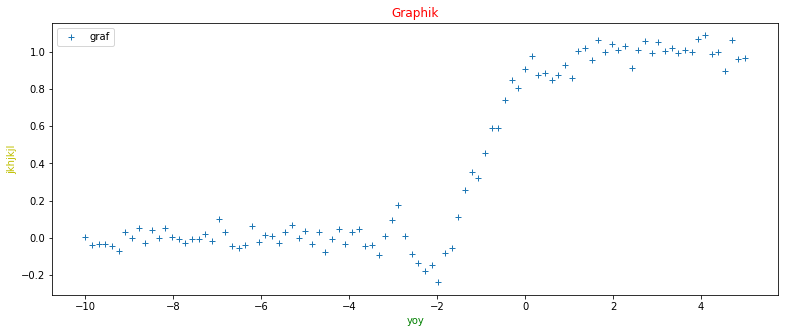

In [3]:
x_train = torch.linspace(-10, 5, 100)
noise_y = torch.randn(100)/20

def target_function(x):
    return 2**x * torch.sin(2**-x)

y_target = target_function(x_train)
y_target += noise_y
plt.plot(x_train.numpy(), y_target.numpy(), '+', label='graf');
plt.title("Graphik", c='r');
plt.xlabel("yoy", c='g');
plt.ylabel("jkhjkjl", c='y');
plt.legend(loc='upper left');
x_train.unsqueeze_(1);
y_target.unsqueeze_(1);

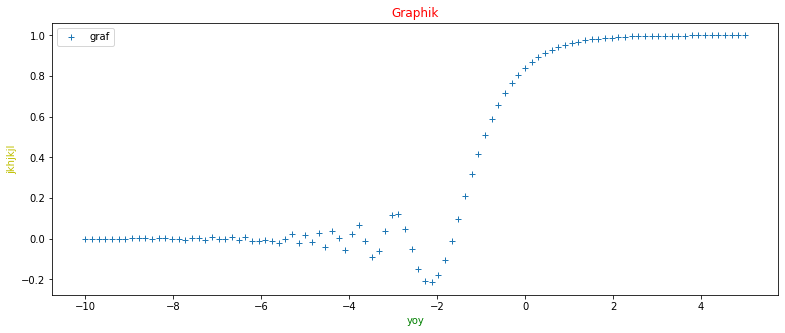

In [4]:
x_validation = torch.linspace(-10, 5 ,100)
y_validation = target_function(x_validation)

plt.plot(x_validation.numpy(), y_validation.numpy(), '+', label='graf');
plt.title("Graphik", c='r');
plt.xlabel("yoy", c='g');
plt.ylabel("jkhjkjl", c='y');
plt.legend(loc='upper left');

x_validation.unsqueeze_(1);
y_validation.unsqueeze_(1);

In [0]:

for epoch in range(1000):
    optimizer.zero_grad()
    y_train = reg.forward(x_train)
    function = loss(y_train, y_target)
    function.backward()
    optimizer.step()

In [0]:
def metric(pred, target):
    return (pred - target).abs().mean()

0.02490369789302349


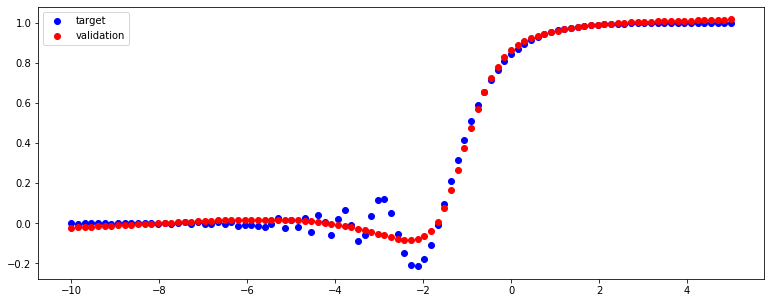

In [10]:
plt.plot(x_validation.data.numpy(), y_validation.data.numpy(), 'o', c='b', label='target')
plt.plot(x_validation.data.numpy(), reg.forward(x_validation).data.numpy(), 'o', c='r', label='validation')
plt.legend(loc="upper left");

print(metric(reg.forward(x_validation), y_validation).item())